In [1]:
from nagasaki.clients.bitclude.core import BitcludeClient
from nagasaki.clients.deribit_client import DeribitClient
from nagasaki.clients.yahoo_finance.core import YahooFinanceClient

In [2]:
b = BitcludeClient(bitclude_url_base="https://api.bitclude.com", bitclude_client_id=, bitclude_client_key="")
d = DeribitClient(deribit_url_base="https://www.deribit.com/api/v2",deribit_client_id="", deribit_client_secret="")
y = YahooFinanceClient(api_key="")

In [76]:
def get_inventory_parameter():
    balances = b.fetch_account_info().balances
    total_pln = float(balances["PLN"].active + balances["PLN"].inactive)
    total_btc = float(balances["BTC"].active + balances["BTC"].inactive)

    btc_mark_price_pln = USD_PLN

    total_btc_value_in_pln = float(total_btc) * btc_mark_price_pln
    wallet_sum_in_pln = total_pln + total_btc_value_in_pln
    pln_to_sum_ratio = (
        total_btc_value_in_pln / wallet_sum_in_pln
    )  # values from 0 to 1
    return pln_to_sum_ratio * 2 - 1

def get_delta_adjusted_for_inventory_ask(inventory_parameter):
    A = -0.0035
    B = 0.0055
    res = A * inventory_parameter + B
    if res <= 0:
        raise StrategyException(
            f"Delta is too small for inventory parameter: {res}"
        )
    return res

def get_delta_adjusted_for_inventory_bid(inventory_parameter):
    A = 0.0035
    B = 0.0055
    res = A * inventory_parameter + B
    if res <= 0:
        raise StrategyException(
            f"Delta is too small for inventory parameter: {res}"
        )
    return res

In [18]:
USD_PLN = float(y.fetch_usd_pln_quote())
BTC_USD = float(d.fetch_index_price_btc_usd())
INVENTORY = float(get_inventory_parameter())

BTC_PLN = BTC_USD * USD_PLN

In [19]:
get_delta_adjusted_for_inventory(0)

0.0055

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
# Main loop

# Take Deribit USD 
# Take USD_PLN 

# Important: Calculate inventory parameter [-1,1] 

# Quote price on bitclude ( 0.3% - 0.7% ) depending on inventory 
# Sleep 60 
# Repeat 



In [8]:
import numpy as np

In [48]:
x_data  = np.linspace(-1,1, num=50)

In [77]:
ask_data = [get_delta_adjusted_for_inventory_ask(x) for x in x_data]

bid_data = [get_delta_adjusted_for_inventory_bid(x) for x in x_data]


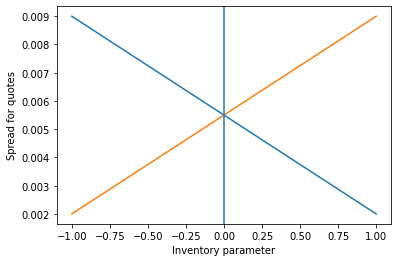

In [78]:
plt.plot(x_data, ask_data)
plt.plot(x_data,bid_data)

plt.xlabel("Inventory parameter")
plt.ylabel("Spread for quotes")

plt.axvline(x=0, )
plt.show()

# X axis - inventory parameter 
# Y axsis - spread for quoting 

In [83]:
# Goal is to calculate ASK and BID price to quote on bitclude 

#get_delta_adjusted_for_inventory_ask(INVENTORY)


#get_delta_adjusted_for_inventory_ask(0)

get_delta_adjusted_for_inventory_bid(INVENTORY)

0.0019999999999999996

In [84]:
BID = BTC_PLN * (1 - get_delta_adjusted_for_inventory_bid(INVENTORY))

In [85]:
BID

169734.3777801324

In [86]:
ASK = BTC_PLN * (1 + get_delta_adjusted_for_inventory(INVENTORY))

In [88]:
ASK

171605.1975753042

In [ ]:
# WHILE TRUE 

